<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/blending_demo_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download repo:

In [1]:
!git clone https://github.com/lofrienger/Single_SurgicalScene_For_Segmentation.git

Cloning into 'Single_SurgicalScene_For_Segmentation'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 115 (delta 11), reused 89 (delta 0), pack-reused 0
Receiving objects: 100% (115/115), 31.01 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (11/11), done.


Foreground image to foreground:

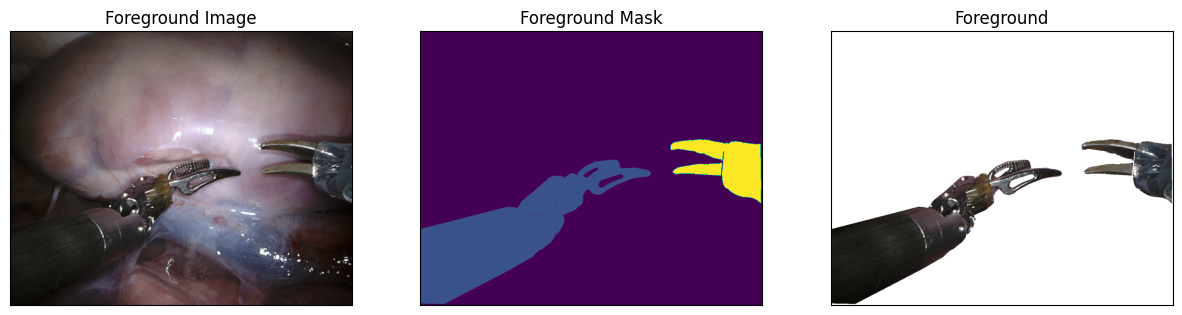

In [114]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

fg_img = Image.open('/content/Single_SurgicalScene_For_Segmentation/data_gen/foreground/1-Bipolar_Forceps/image_3/seq_10_frame017.png')
fg_mask = Image.open('/content/Single_SurgicalScene_For_Segmentation/data_gen/foreground/1-Bipolar_Forceps/mask/seq_10_frame017.png')
images = np.expand_dims(np.array(fg_img), axis=0)
segmaps = np.expand_dims(np.array(fg_mask), axis=0)
segmaps = np.expand_dims(segmaps, axis=3)
images = np.squeeze(images)
segmaps = np.squeeze(segmaps)
image_pil = Image.fromarray(images).convert('RGBA')
mask_pil = Image.fromarray(segmaps).convert('RGBA')

image_np = np.array(image_pil)
mask_np = np.array(mask_pil)

image_np[mask_np[:,:,:]==0] = 255
fg = Image.fromarray(image_np)

num_img = 3
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(fg_img)
ax[0].set_title('Foreground Image')
ax[1].imshow(fg_mask)
ax[1].set_title('Foreground Mask');
ax[2].imshow(fg, cmap='gray')
ax[2].set_title('Foreground');

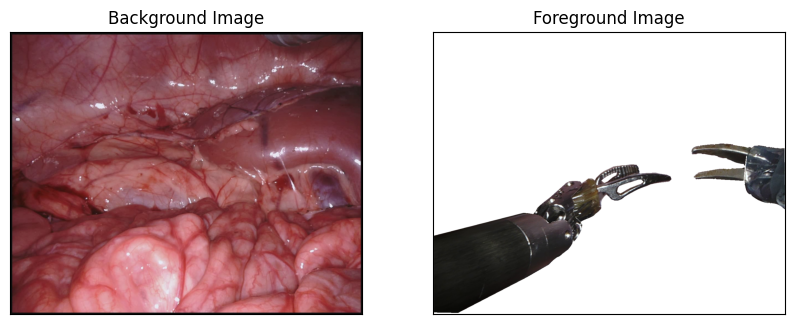

In [121]:
bg = Image.open('/content/Single_SurgicalScene_For_Segmentation/data_gen/background/raw/3-frame020.png')#.convert('RGBA')
num_img = 2
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(bg)
ax[0].set_title('Background Image')
ax[1].imshow(fg)
ax[1].set_title('Foreground Image');

Blend images and create corresponding mask: